<a href="https://colab.research.google.com/github/Dpegs22/Dpegs22.github.io/blob/master/Chicago_Homicide_Breakdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For my final capstone project, I examined the murder rate in Chicago from 2001 to 2019. I hypothesized that the numbers of murders went down from 2001 to 2019. I looked at numerous things: when murders occurred, where murders occurred, the time of day when murders occurred, and the day of week when murders occurred.

First, I imported the data from the Chicago crime database as seen below.

In [0]:
import requests
broken_url = 'https://data.cityofchicago.org/resource/crimes.json'
data = requests.get(broken_url)
print(data.ok)
print(data.status_code)

True
200


Next, I imported pandas, numpy, scipy, seaborn, matplot.lib, math, and warnings.

In [0]:
import pandas as pd
import numpy as np
from scipy import stats as scipy
from scipy.stats import ttest_ind
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import math
from statsmodels.stats.weightstats import ttest_ind
# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

In [0]:
#@title
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/Capstone Project 3/Homicides_from_2001_to_2019.csv')

# Data Investigation and Manipulation

Below is a description of the data. There is 10,037 entries in 22 columns.



In [0]:
# Shows all of the years including 2020
df.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [0]:
# Removes 2020
df_not_2020 = df[df.Year != 2020]
df_not_2020.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [0]:
# Shows all of the columns
df_not_2020.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [0]:
# information about the data set
df_not_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 22 columns):
ID                      10037 non-null int64
Case Number             10037 non-null object
Date                    10037 non-null object
Block                   10037 non-null object
IUCR                    10037 non-null int64
Primary Type            10037 non-null object
Description             10037 non-null object
Location Description    10037 non-null object
Arrest                  10037 non-null bool
Domestic                10037 non-null bool
Beat                    10037 non-null int64
District                10037 non-null int64
Ward                    9653 non-null float64
Community Area          9653 non-null float64
FBI Code                10037 non-null object
X Coordinate            10034 non-null float64
Y Coordinate            10034 non-null float64
Year                    10037 non-null int64
Updated On              10037 non-null object
Latitude                


Now, I began manipulating data in order to create visuals. First, I converted all of the police districts into one of three locations: South, Central, North.

In [0]:
def district_location(n):
	if n['District'] == 4: return 'South' 
	if n['District'] == 5: return 'South'
	if n['District'] == 6: return 'South'
	if n['District'] == 22: return 'South'
	if n['District'] == 1: return 'Central'
	if n['District'] == 2: return 'Central'
	if n['District'] == 3: return 'Central'
	if n['District'] == 8: return 'Central'
	if n['District'] == 9: return 'Central'
	if n['District'] == 10: return 'Central'
	if n['District'] == 12: return 'Central'
	if n['District'] == 18: return 'Central'
	else:
		return 'North'

df_not_2020['district_string'] = df_not_2020.apply(district_location,axis = 1)
df_not_2020[['District', 'district_string']]

,District,district_string
0,18,Central
1,11,North
2,10,Central
3,8,Central
4,25,North
...,...,...
10032,6,South
10033,8,Central
10034,7,North
10035,5,South


# Now, I created some graphs that explain the data.




This graph shows the number of murders for each of the 25 districts.


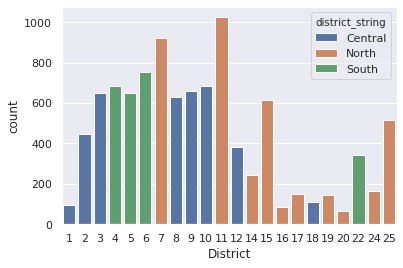

In [0]:
ax = sns.countplot(x = 'District', hue = 'district_string', data = df_not_2020, dodge = False)
#df_not_2020.groupby(['District', 'district_string']).size()






This graph shows the total number of murders for each area of Chicago. The exact numbers are on the bottom.

North      3933
Central    3667
South      2437
Name: district_string, dtype: int64


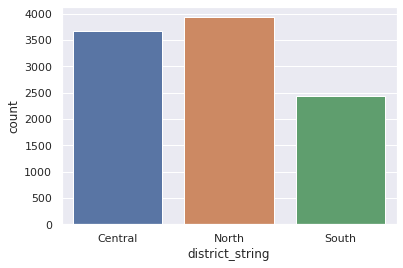

In [0]:
# Shows the total number of murders for each area within Chicago
p = pd.value_counts(df_not_2020['district_string'])
print(p)

# Creates a bar graph of the data
dx = sns.countplot(x = df_not_2020['district_string'], data = df_not_2020)

This graph shows the total number of homicides for each year from 2001 to 2019.

Text(0, 0.5, 'Murders')

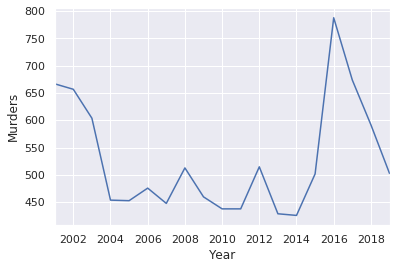

In [0]:
df_not_2020.groupby('Year').size().plot.line(legend='') 
plt.xlabel('Year') 
plt.ylabel('Murders')

This creates a line plot of the number of homicides that occur at each hour of the day

In [0]:
# This creates a function hr_func
def hr_func(ts):
    return ts.hour
df_not_2020['Date']= pd.to_datetime(df_not_2020['Date'])
df_not_2020['Hour'] = df_not_2020['Date'].apply(hr_func)

import pandas as pd
df_not_2020['Week Day'] = df_not_2020['Date'].dt.day_name()

#dg = pd.Timestamp(df_not_2020['Date'].values)
#print(df_not_2020['Date'].dt.day_name())

Text(0, 0.5, 'Murders')

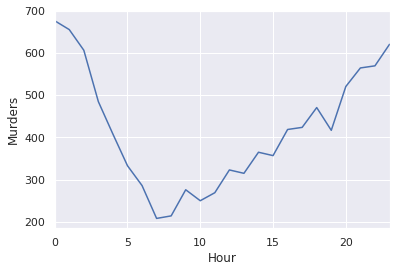

In [0]:
# This lineplot determines at what time of day the murders occurred
df_not_2020.groupby('Hour').size().plot.line(legend='') 
plt.xlabel('Hour') 
plt.ylabel('Murders')
#lineplot(table(responses), horiz=T, xlab="Hour",ylab="Homicides")

Text(0, 0.5, 'Murders')

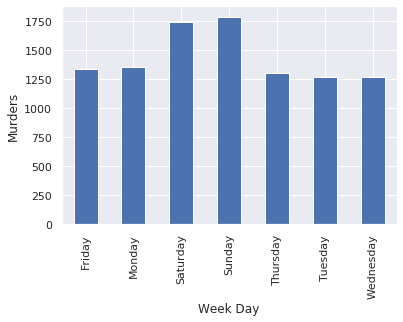

In [0]:
# This bar graph determines what day of the week the murders occurred
df_not_2020.groupby('Week Day').size().plot.bar(legend='') 
plt.xlabel('Week Day') 
plt.ylabel('Murders')

# Now it time to do some hypothesis testing on the data. 

I want to examine if there is a significant difference in the number of murders before and after 2010. I examined the hour of the day. 
My null hypothesis is 



*   Ho: p1 - p2 = 0
*   Ha: p1 - p2 ≠ 0

First, I created two new dataframes: one for before 2009 and one for after 2009

In [0]:
# before_2009 and before_2010 are two new dataframes
before_2010 = df_not_2020[(df_not_2020.Year >= 2000) & (df_not_2020.Year <= 2009)]
after_2010 = df_not_2020[df_not_2020.Year >= 2010]

# created 2 new columns in the 2 new dataframes
before_2010['type'] = "before 2010"
after_2010['type'] = "after 2010"

In [0]:
# before 2010 data frame
before_2010

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,district_string,Hour,Week Day,type
0,983,G446123,2001-07-29 10:15:00,011XX N LASALLE ST,110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,1824,18,NaN,NaN,01A,NaN,NaN,2001,5/3/2018 15:49,NaN,NaN,NaN,Central,10,Sunday,before 2010
1,905,G380193,2001-06-29 23:26:00,034XX W FULTON ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,1123,11,NaN,NaN,01A,0.0,0.0,2001,5/3/2018 15:49,36.619446,-91.686566,"(36.619446395, -91.686565684)",North,23,Friday,before 2010
2,937,G411262,2001-07-15 00:34:00,030XX S HARDING ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1031,10,NaN,NaN,01A,0.0,0.0,2001,5/3/2018 15:49,36.619446,-91.686566,"(36.619446395, -91.686565684)",Central,0,Sunday,before 2010
3,1000,G397434,2001-08-09 19:30:00,079XX S CAMPBELL AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,835,8,18.0,70.0,01A,1161093.0,1851842.0,2001,3/19/2019 16:11,41.749136,-87.685268,"(41.749135591, -87.685268108)",Central,19,Thursday,before 2010
4,1001,G473112,2001-08-10 01:04:00,048XX W KAMERLING AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,2533,25,37.0,25.0,01A,1143890.0,1908544.0,2001,3/19/2019 16:11,41.905073,-87.746889,"(41.905072512, -87.746889161)",North,1,Friday,before 2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,5120,HR412222,2009-07-14 00:30:00,006XX E 87TH ST,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,632,6,6.0,44.0,01A,1182200.0,1847444.0,2009,3/18/2019 16:08,41.736605,-87.608060,"(41.736604706, -87.608060119)",South,0,Tuesday,before 2010
4728,5121,HR427696,2009-07-14 04:00:00,006XX W 89TH ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,2223,22,21.0,71.0,01A,1173385.0,1845901.0,2009,3/18/2019 16:08,41.732570,-87.640401,"(41.732569819, -87.640400769)",South,4,Tuesday,before 2010
4729,5122,HR427791,2009-07-14 03:56:00,017XX S UNION AVE,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,1233,12,25.0,31.0,01A,1171821.0,1891561.0,2009,3/18/2019 16:08,41.857900,-87.644791,"(41.857900215, -87.6447906)",Central,3,Tuesday,before 2010
4730,5123,HR431090,2009-07-15 22:07:00,029XX W PALMER ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1414,14,35.0,22.0,01A,1156099.0,1914609.0,2009,3/19/2019 16:11,41.921478,-87.701877,"(41.921477579, -87.701877404)",North,22,Wednesday,before 2010


In [0]:
# after 2010 dataframe
after_2010

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,district_string,Hour,Week Day,type
4732,19711,HS657617,2010-12-13 02:02:00,057XX S DAMEN AVE,110,HOMICIDE,FIRST DEGREE MURDER,GANGWAY,True,False,715,7,15.0,67.0,01A,1164006.0,1866628.0,2010,9/4/2019 16:07,41.789650,-87.674178,"(41.789649698, -87.674178458)",North,2,Monday,after 2010
4733,19304,HS227745,2010-03-27 04:50:00,124XX S MICHIGAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,532,5,9.0,53.0,01A,1179095.0,1822625.0,2010,6/17/2019 16:07,41.668569,-87.620189,"(41.668569194, -87.620188694)",South,4,Saturday,after 2010
4734,19237,HS102143,2010-01-02 16:17:00,110XX S LOWE AVE,110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,2233,22,34.0,49.0,01A,1173942.0,1831677.0,2010,3/19/2019 16:11,41.693525,-87.638781,"(41.693524794, -87.638780573)",South,16,Saturday,after 2010
4735,19238,HS101859,2010-01-02 21:44:00,057XX S LOOMIS BLVD,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,713,7,16.0,67.0,01A,1167976.0,1866692.0,2010,3/18/2019 16:08,41.789741,-87.659620,"(41.789740875, -87.659619818)",North,21,Saturday,after 2010
4736,19239,HS102573,2010-01-03 15:04:00,059XX S WOLCOTT AVE,110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,714,7,15.0,67.0,01A,1164705.0,1865282.0,2010,3/19/2019 16:11,41.785941,-87.671653,"(41.785941369, -87.671653413)",North,15,Sunday,after 2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,24551,JC271105,2019-05-20 18:07:00,078XX S STATE ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,623,6,6.0,69.0,01A,1177650.0,1852817.0,2019,5/27/2019 16:12,41.751453,-87.624568,"(41.751452878, -87.624567581)",South,18,Monday,after 2010
10033,24554,JC274572,2019-05-23 01:00:00,069XX S MAPLEWOOD AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,False,False,832,8,17.0,66.0,01A,1160573.0,1858532.0,2019,5/30/2019 16:12,41.767505,-87.686989,"(41.767504682, -87.686989416)",Central,1,Thursday,after 2010
10034,24556,JC276141,2019-05-24 02:12:00,013XX W 61ST ST,110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,False,713,7,16.0,67.0,01A,1168477.0,1864312.0,2019,5/31/2019 16:09,41.783199,-87.657851,"(41.783199083, -87.657851361)",North,2,Friday,after 2010
10035,24557,JC278422,2019-05-25 19:01:00,001XX W 109TH PL,110,HOMICIDE,FIRST DEGREE MURDER,GANGWAY,False,False,513,5,34.0,49.0,01A,1177313.0,1832344.0,2019,6/1/2019 16:04,41.695280,-87.626419,"(41.695279885, -87.626418591)",South,19,Saturday,after 2010


In [0]:
# before 2010 count, mean, standard deviation, minimum, 1st quartile, median, 3rd quartile, and maximum
before_2010.describe()

,ID,IUCR,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Hour
count,4.732000e+03,4732.000000,4732.000000,4732.000000,4348.000000,4348.000000,4.730000e+03,4.730000e+03,4732.000000,4730.000000,4730.000000,4732.000000
mean,1.477847e+04,110.087701,1066.821429,10.166948,19.721711,41.583257,1.152416e+06,1.857222e+06,2004.672443,41.763257,-87.713530,11.270499
std,2.171405e+05,1.671159,645.291323,6.353267,11.819197,19.611683,1.236678e+05,1.997932e+05,2.648757,0.553280,0.426725,7.953917
min,6.340000e+02,110.000000,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566,0.000000
25%,1.816750e+03,110.000000,611.000000,5.000000,9.000000,25.000000,1.152432e+06,1.855570e+06,2002.000000,41.758878,-87.715631,3.000000
50%,3.000500e+03,110.000000,931.000000,9.000000,20.000000,42.000000,1.165988e+06,1.873471e+06,2004.000000,41.808213,-87.666422,12.000000
75%,4.184250e+03,110.000000,1422.000000,14.000000,28.000000,61.000000,1.177166e+06,1.901437e+06,2007.000000,41.885384,-87.626117,19.000000
max,5.097907e+06,142.000000,2535.000000,25.000000,50.000000,77.000000,1.204790e+06,1.951122e+06,2009.000000,42.021515,-87.525759,23.000000


In [0]:
# here are the yearly murder totals per year before 2010
before_2010.groupby('Year').size()

Year
2001    667
2002    657
2003    604
2004    454
2005    453
2006    476
2007    448
2008    513
2009    460
dtype: int64

In [0]:
# after 2010 count, mean, standard deviation, minimum, 1st quartile, median, 3rd quartile, and maximum
after_2010.describe()

,ID,IUCR,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Hour
count,5.305000e+03,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5.304000e+03,5.304000e+03,5305.000000,5304.000000,5304.000000,5305.000000
mean,1.016940e+05,110.232611,1019.215457,9.928181,19.957964,43.406598,1.165206e+06,1.875942e+06,2014.840339,41.815169,-87.669563,12.059189
std,9.276932e+05,2.708116,614.409027,6.118698,11.402743,19.515560,1.582342e+04,2.850801e+04,2.795836,0.078455,0.057503,7.657834
min,1.923700e+04,110.000000,111.000000,1.000000,1.000000,1.000000,1.116633e+06,1.815115e+06,2010.000000,41.647923,-87.846467,0.000000
25%,2.069800e+04,110.000000,611.000000,6.000000,9.000000,26.000000,1.152236e+06,1.854744e+06,2012.000000,41.756500,-87.716538,4.000000
50%,2.218000e+04,110.000000,913.000000,9.000000,20.000000,43.000000,1.166098e+06,1.869651e+06,2015.000000,41.797828,-87.666415,13.000000
75%,2.355500e+04,110.000000,1231.000000,12.000000,28.000000,63.000000,1.177360e+06,1.899325e+06,2017.000000,41.879691,-87.625751,19.000000
max,1.192834e+07,142.000000,2535.000000,25.000000,50.000000,77.000000,1.204706e+06,1.951492e+06,2019.000000,42.022548,-87.526025,23.000000


In [0]:
# here are the yearly murder totals per year after and including 2010
after_2010.groupby('Year').size()

Year
2010    438
2011    438
2012    515
2013    429
2014    426
2015    502
2016    788
2017    674
2018    592
2019    503
dtype: int64

Now, I compared the distriubtions of the two samples. They are very similar.

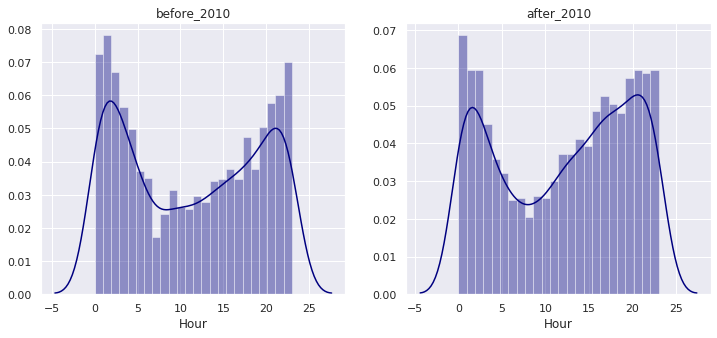

In [0]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.distplot(before_2010['Hour'], bins=24, ax=ax[0], color='navy')
ax[0].set_title('before_2010')
sns.distplot(after_2010['Hour'], bins=24, ax=ax[1], color='navy')
ax[1].set_title('after_2010');

In [0]:
# Information about the hour when homicides occurred

def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

series_statistics(df_not_2020['Hour'])

statistics for column: Hour
The max value in the column: 23
The min value in the column: 0
The mode value in the column: 0    0
dtype: int64
The median value in the column: 13.0
The mean of the column: 11.687356779914317
The std of the column: 7.808367204690474


In [0]:
# t-test for 'Hour'
from statsmodels.stats.weightstats import ttest_ind
ttest = ttest_ind(before_2010['Hour'], after_2010['Hour'])
ttest

(-5.057556655801321, 4.321706223519158e-07, 10035.0)

Since my p-value was less than 0.05, I reject my null hypothesis. In the context of my project, that means that the number of murders has stayed the same or gone up from 2001 to 2019.

In [0]:
# t-test for 'Year'
ttest = ttest_ind(before_2010.groupby('Year').size(), after_2010.groupby('Year').size())
ttest

(-0.09533504510766026, 0.9251634745927606, 17.0)

This above data was done because I thought about looking more closely at the year.

In [0]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = before_2010.shape[0]
sample_2_n = after_2010.shape[0]
sample_1_mean = before_2010['Hour'].mean()
sample_2_mean = after_2010['Hour'].mean()
sample_1_var = before_2010['Hour'].var()
sample_2_var = after_2010['Hour'].var()

import math

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 0.4823799684586586 and 1.0950014553086125.


In [0]:
#Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")
  
print(get_cohens_d(before_2010['Hour'], after_2010['Hour']))

Cohen's d is: -0.10101991685443167.


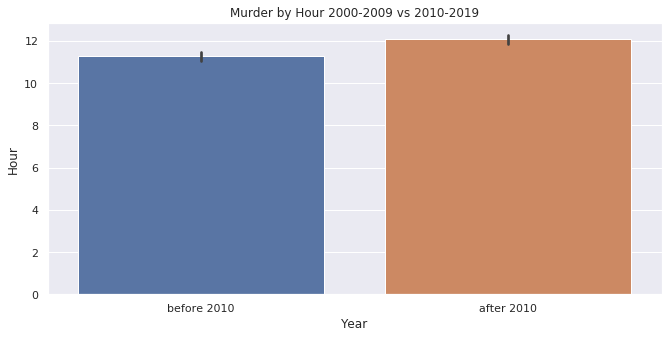

In [0]:
murder_test= pd.concat([before_2010, after_2010])

plt.figure(figsize = (11,5))
sns.barplot(x="type", y="Hour", data=murder_test)
plt.xlabel('Year')
plt.ylabel('Hour')
plt.title('Murder by Hour 2000-2009 vs 2010-2019');

Based on my data above, I would reject my null hypothesis and accept that the number of murders stayed the same or went up from 2001 to 2019.


# Conclusion

From my data, I reject the null hypothesis that the number of murders went down from 2001 to 2019. 
This is not surprising at all to me. Chicago is a tale of two cities where the difference between the haves and the have nots is growing drastically. The worse areas of Chicago are getting worse, while the nicer areas are either getting nicer or staying the same. Further, since the worse areas of Chicago are getting poorer, people are turning to crime.
Two groups of people that can use my data to make decisions about Chicago are the city council and people moving to Chicago. The former can use my data to make decisions about how to bring down Chicago's murder rate (shifting of the police force, development location, etc.). The latter can use my data by determining where in Chicago they want to live.